# **Handling Categorical Missing Data**


You can fix it by,
- filling the most frequent value $(mode)$
- also creating a new category (e.g. "Missing")

Here Mode is mostly is used to fill categorical data.

When missing data ratio is more than 5 %, then you should create a new category.



In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [142]:
df = pd.read_csv('big_data.csv')[['GarageQual','FireplaceQu', 'SalePrice']]
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [143]:
print(df.isna().mean()*100,'\n')
print(df['GarageQual'].unique(), '\n')
print(df['FireplaceQu'].unique())

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64 

['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


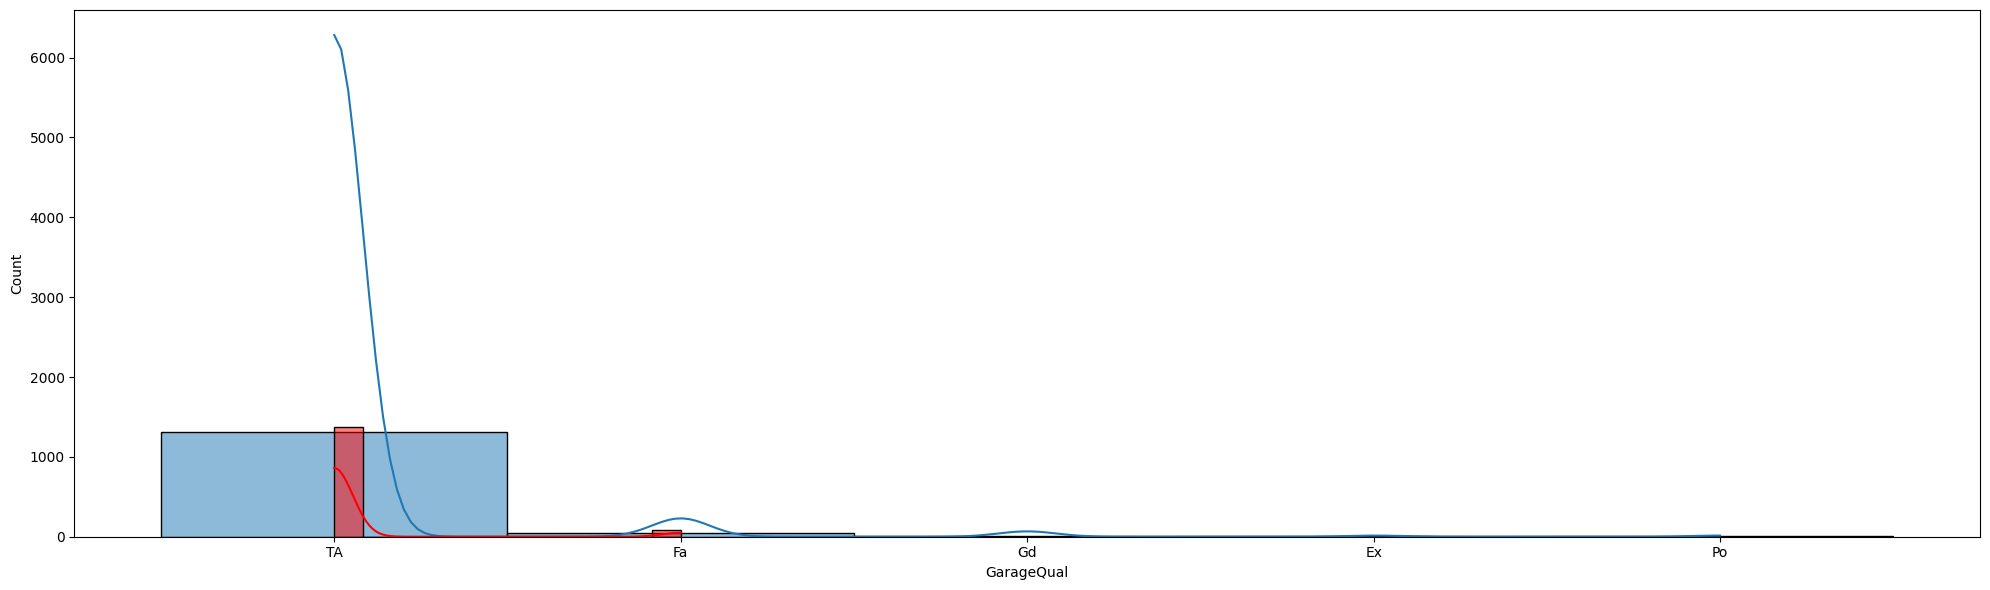

In [144]:
plt.figure(figsize=(20,6))
sns.histplot(df['GarageQual'], kde=True)
sns.histplot(df['GarageQual'].isna(), kde=True, color='red')

plt.tight_layout()
plt.show()

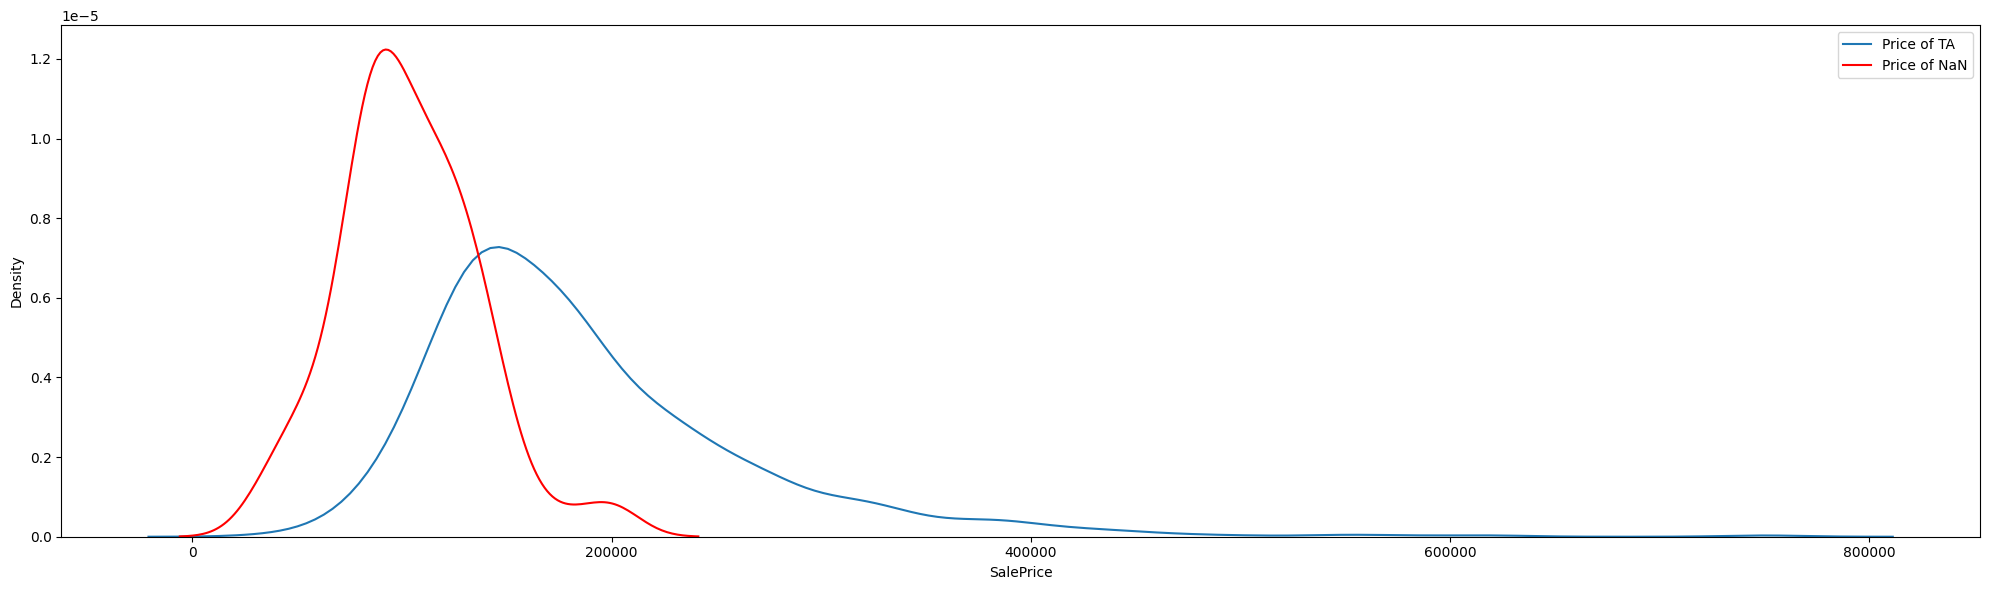

In [145]:
# comparing the sales price of 'TA' and 'NaN' values

plt.figure(figsize=(20,6))
sns.kdeplot(df[df['GarageQual']=='TA']['SalePrice'])
# selects only the rows where the Garage Quality is 'TA'
# ['SalePrice'] takes the sale prices for those specific houses
sns.kdeplot(df[df['GarageQual'].isna()]['SalePrice'], color='red')

plt.legend(['Price of TA', 'Price of NaN'])
plt.tight_layout()
plt.show()

In [146]:
# finding the mode value in the feature 'GarageQual' to replace it with the missing values
df['GarageQual'].mode()

# it has print 'TA' is the mode value 

0    TA
Name: GarageQual, dtype: object

In [147]:
temp_ta = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts()

C:\Users\biswa\AppData\Local\Temp\ipykernel_18784\1416325009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

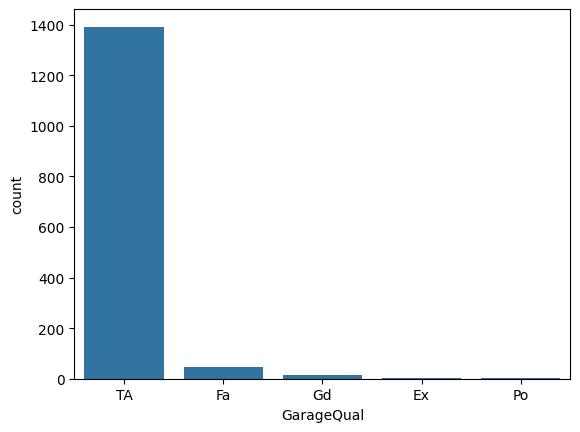

In [148]:
sns.barplot(df['GarageQual'].value_counts())
plt.show()

In [149]:
df['FireplaceQu'].isna().mean()*100

np.float64(47.26027397260274)

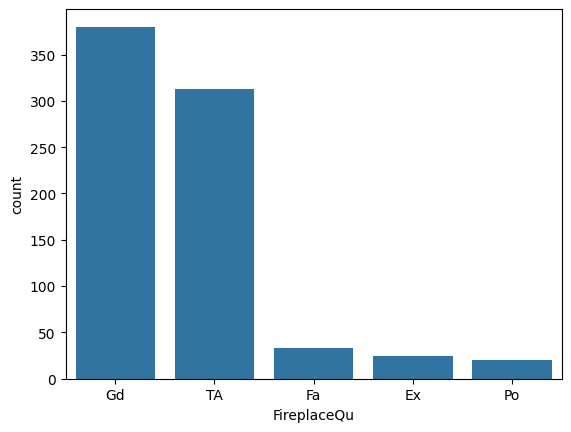

In [150]:
sns.barplot(df['FireplaceQu'].value_counts())
plt.show()

In [151]:
print(df.isna().mean()*100, '\n')
print('The mode value of FireplaceQu is : ', df['FireplaceQu'].mode())

GarageQual      0.000000
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64 

The mode value of FireplaceQu is :  0    Gd
Name: FireplaceQu, dtype: object


In [152]:
df['FireplaceQu_1'] = df['FireplaceQu'].fillna('Gd')

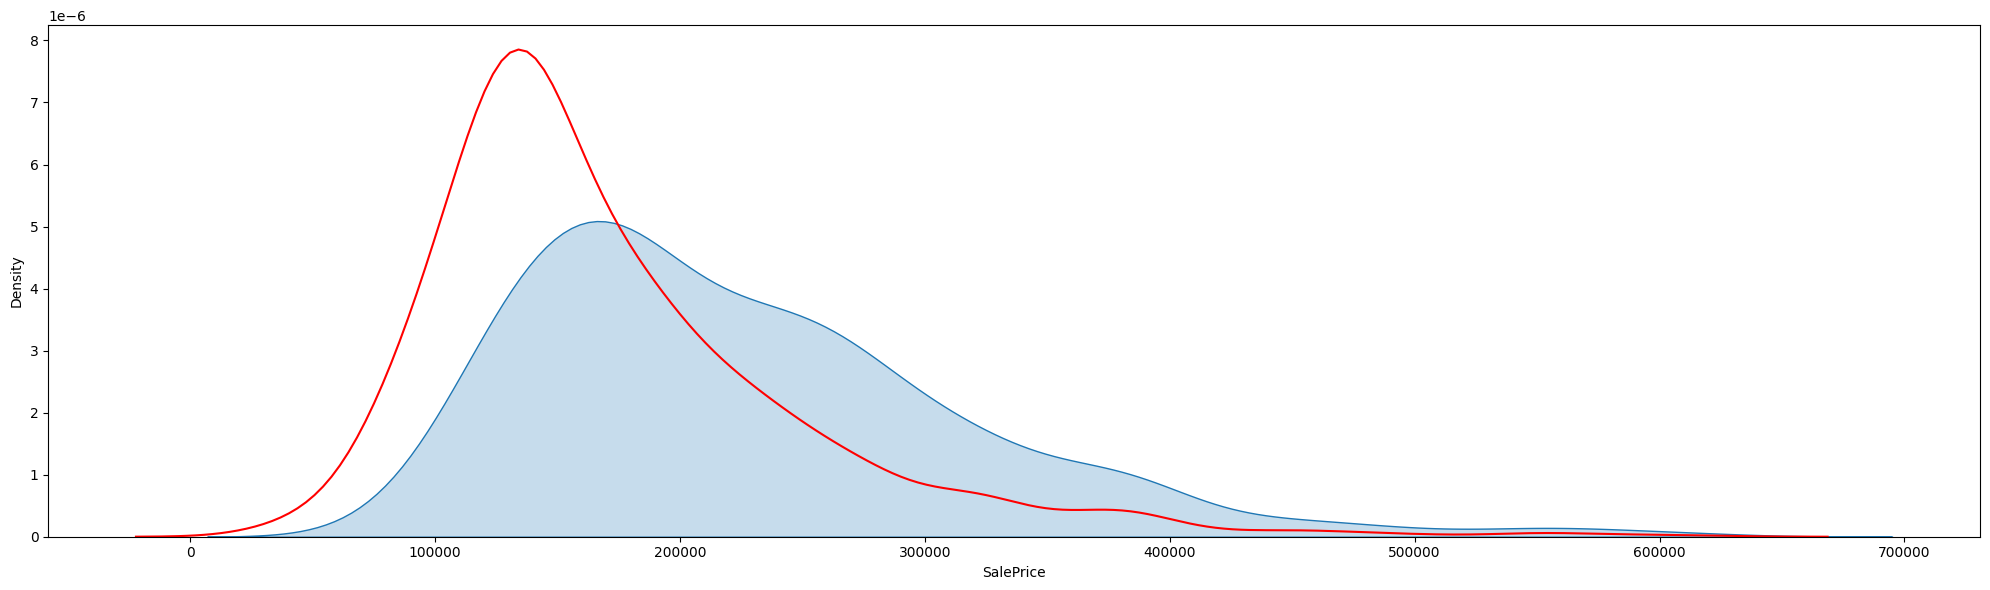

In [153]:
plt.figure(figsize=(20,6))

sns.kdeplot(df[df['FireplaceQu']=='Gd']['SalePrice'], fill=True)
sns.kdeplot(df[df['FireplaceQu_1']=='Gd']['SalePrice'], color='red')

plt.tight_layout()
plt.show()

# now you can clearly see the difference btwn the two features before and after the imputation


#### **Writing the syntax for how to use imputer in sklearn**
```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

```



